In [3]:
%matplotlib inline

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import geodatasets

from shapely.geometry import Point

# 05. Working with Spatial Data. Network Analysis
### Reading, exploring and analyzing, feature extraction
Topics:
* Projections;
* Reading spatial data;
* EDA and processing;
* Network analysis: graph basics, types of graphs;
* Finding important nodes;
* Finding structures within graphs.

In [5]:
print("Everything is working...")

Everything is working...


One thing, before we start. If we have a large LLM, typos are not always something bad. This way our model could know, that this typo exists, but if our learning data is small, then it's not a good idea to left the typos there, because it could feed the model with *only* the wrong data.

### Table of Contents
* Geospatial data
    * Reading and exploring
    * Projections
    * Visualization
        * Scatter plots
        * Choropleth maps
* Network analysis
    * Graphs, types of graphs
    * Shortest path between nodes
    * Centrality
    * Communities

### Geospatial Data
Exploring, analyzing and visualizing

* Data that has a geographic component to it
    * Most commonly: coordinates (latitude, longtitude)
    * Sometimes: country, city, ZIP code, address
    * Not necessarily on Earth ([Google Mars](https://www.google.com/mars/))
* Sources
    * Satelite images
    * GPS data
    * Geotagging (e.g. photos at Facebook)
    * Manual entry, etc.
* Working with spatial data isn't trivial...
    * E.g., we need geometry on a sphere to calculate distances
    * ... but we have libraries that make our lives easier

[`Geocoding`](https://en.wikipedia.org/wiki/Address_geocoding) - Showing non-geographical information as a geographical one. The reverse process is called... well... `reverse geocoding`. For example, if we want to go to the softuni centre, first the map finds the coordinates using geocoding, after that it finds our location with reverse geocoding...

Also, the Earth is not flat... sadly. So we could not just get the shortest path using Eucledian distance... the shortest path will be going *trough* the earth this way... The [spherical triangle](https://en.wikipedia.org/wiki/Spherical_trigonometry) is something way more complex.
<img src="images/st.png">

BTW, the three angles are both 90 degrees xd

### Reading and Exploring Geospatial Data
* In some cases, we have convenient datasets
* In other cases, it's in specific formats
    * GeoJSON, Shapefile, KML, etc.
    * Some libraries (like geopandas) can read these automatically
* Data cleaning
    * Non-spatial columns: proceed as usual
        * Tidy up the data, impute or remove missing values, explore outliers, normalize columns, etc.
    * Spatial columns: fixing or changing coordinates is easier when you visualize them
* Exploratory data analysis
    * Most commonly: look for clusters and other patterns
    * Also: compare attributes across different regions
        * E.g., income by country

In [6]:
# We will use this dataset for the following examples
earthquake_data = pd.read_csv("data/earthquakes.csv")

In [7]:
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [8]:
earthquake_data.shape

(23412, 21)

In [10]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

Hm... date and time are objects (stored as texts)... we need to convert them.

In [11]:
earthquake_data["Magnitude Type"].astype("category")

0         MW
1         MW
2         MW
3         MW
4         MW
        ... 
23407     ML
23408     ML
23409    MWW
23410    MWW
23411     MB
Name: Magnitude Type, Length: 23412, dtype: category
Categories (10, object): ['MB', 'MD', 'MH', 'ML', ..., 'MWB', 'MWC', 'MWR', 'MWW']

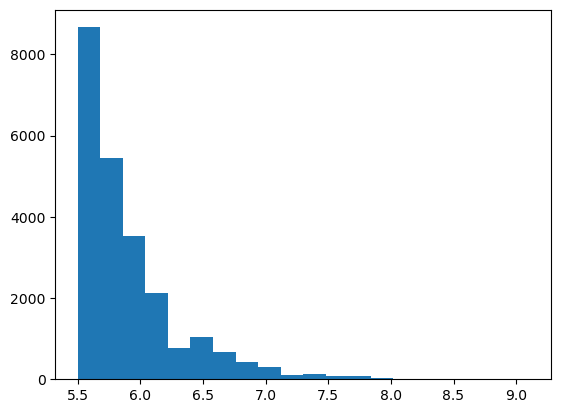

In [14]:
plt.hist(earthquake_data.Magnitude, bins = 20)
plt.show()

In [15]:
earthquake_data.nlargest(5, "Magnitude")

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
17083,12/26/2004,00:58:53,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,...,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed
20501,03/11/2011,05:46:24,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,...,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed
19928,02/27/2010,06:34:12,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,...,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed
16,02/04/1965,05:01:22,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
17329,03/28/2005,16:09:37,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,...,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed


In [16]:
# We could concatenate the date and the time like this
earthquake_data.Date + " " + earthquake_data.Time

0        01/02/1965 13:44:18
1        01/04/1965 11:29:49
2        01/05/1965 18:05:58
3        01/08/1965 18:49:43
4        01/09/1965 13:32:50
                ...         
23407    12/28/2016 08:22:12
23408    12/28/2016 09:13:47
23409    12/28/2016 12:38:51
23410    12/29/2016 22:30:19
23411    12/30/2016 20:08:28
Length: 23412, dtype: object

In [17]:
# But we could not convert it to datetime yet
pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

ParserError: Unknown string format: 1975-02-23T02:58:41.000Z 1975-02-23T02:58:41.000Z present at position 3378

In [25]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time

In [21]:
dt_info.str.len().sort_values(ascending = False)

20650    49
3378     49
7512     49
0        19
15605    19
         ..
7803     19
7802     19
7801     19
7800     19
23411    19
Length: 23412, dtype: int64

As we could see, there are three places, where the date or the time format is other.

In [22]:
dt_info.str.len().sort_values(ascending = False).value_counts()

19    23409
49        3
dtype: int64

In [26]:
# dt_info = [dt_info.str.len() <= 19]
dt_info[dt_info.str.len() <= 19].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            23402, 23403, 23404, 23405, 23406, 23407, 23408, 23409, 23410,
            23411],
           dtype='int64', length=23409)

In [28]:
earthquake_data.loc[dt_info[dt_info.str.len() <= 19].index]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [29]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time

In [30]:
dt_info

0        01/02/1965 13:44:18
1        01/04/1965 11:29:49
2        01/05/1965 18:05:58
3        01/08/1965 18:49:43
4        01/09/1965 13:32:50
                ...         
23407    12/28/2016 08:22:12
23408    12/28/2016 09:13:47
23409    12/28/2016 12:38:51
23410    12/29/2016 22:30:19
23411    12/30/2016 20:08:28
Length: 23412, dtype: object

In [31]:
dt_info.str.len().value_counts()

19    23409
49        3
dtype: int64

So we need to remove the acess three columns...

In [33]:
earthquake_data = earthquake_data.loc[dt_info[dt_info.str.len() <= 19].index]

In [34]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time

In [35]:
dt_info.str.len().value_counts()

19    23409
dtype: int64

In [37]:
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

In [38]:
earthquake_data.drop(columns = ["Date", "Time"])

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
0,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
23408,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
23409,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51
23410,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19


In [39]:
earthquake_data = earthquake_data.drop(columns = ["Date", "Time"])

In [42]:
# Now we could ask how many earthquakes happen in a year
num_earthquakes_by_year = earthquake_data.groupby(earthquake_data.DateTime.dt.year).size()

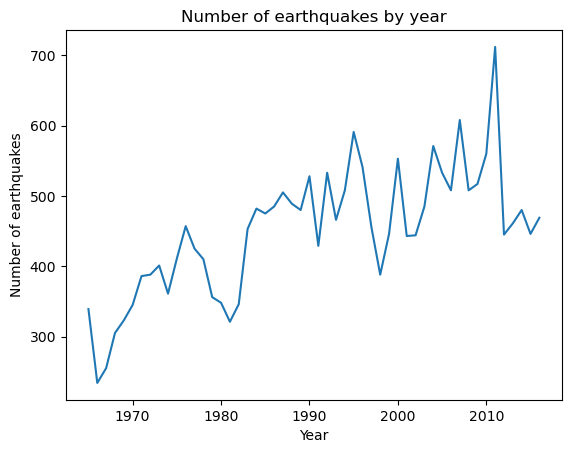

In [43]:
plt.plot(num_earthquakes_by_year)

plt.title("Number of earthquakes by year")

plt.xlabel("Year")
plt.ylabel("Number of earthquakes")

plt.show()

The result is kind of suprising. But we need to know, that the dataset contains many earthquake types. Let's check them out.

In [44]:
earthquake_data.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

This makes me want to plot them all and see the tendention.

In [53]:
earthquake_earthquakes = earthquake_data[earthquake_data.Type == "Earthquake"].groupby(earthquake_data.DateTime.dt.year).size()
nuke_earthquakes = earthquake_data[earthquake_data.Type == "Nuclear Explosion"].groupby(earthquake_data.DateTime.dt.year).size()
explosion_earthquakes = earthquake_data[earthquake_data.Type == "Explosion"].groupby(earthquake_data.DateTime.dt.year).size()
rockburst_earthquakes = earthquake_data[earthquake_data.Type == "Rock Burst"].groupby(earthquake_data.DateTime.dt.year).size()

In [54]:
earthquake_earthquakes

DateTime
1965    339
1966    233
1967    255
1968    303
1969    322
1970    344
1971    386
1972    388
1973    394
1974    355
1975    401
1976    447
1977    417
1978    395
1979    343
1980    335
1981    313
1982    340
1983    443
1984    467
1985    468
1986    484
1987    489
1988    479
1989    473
1990    524
1991    428
1992    532
1993    465
1994    506
1995    589
1996    540
1997    456
1998    388
1999    446
2000    553
2001    443
2002    444
2003    485
2004    571
2005    533
2006    508
2007    608
2008    508
2009    517
2010    559
2011    712
2012    445
2013    461
2014    480
2015    446
2016    469
dtype: int64

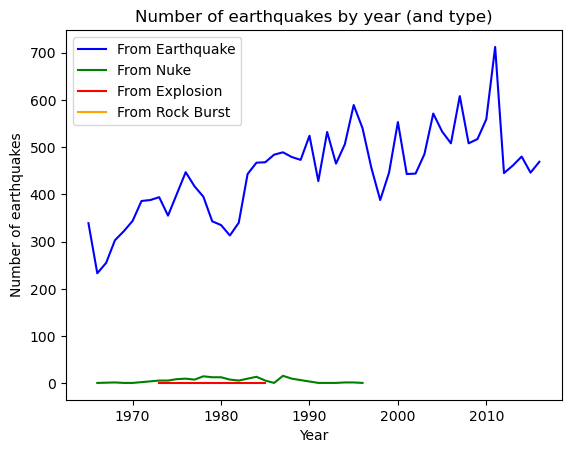

In [55]:
plt.plot(earthquake_earthquakes, label = "From Earthquake", c = "blue")
plt.plot(nuke_earthquakes, label = "From Nuke", c = "green")
plt.plot(explosion_earthquakes, label = "From Explosion", c = "red")
plt.plot(rockburst_earthquakes, label = "From Rock Burst", c = "orange")

plt.title("Number of earthquakes by year (and type)")
plt.legend()

plt.xlabel("Year")
plt.ylabel("Number of earthquakes")

plt.show()

Well... this is kind of expected. :D

In [56]:
earthquake_data.Type.value_counts()

Earthquake           23229
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

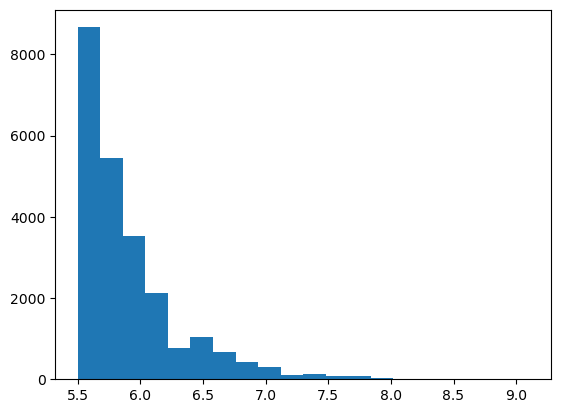

In [57]:
plt.hist(earthquake_data.Magnitude, bins = 20)
plt.show()

Also, this histogram is logaristhic. It shrinks exponentially.

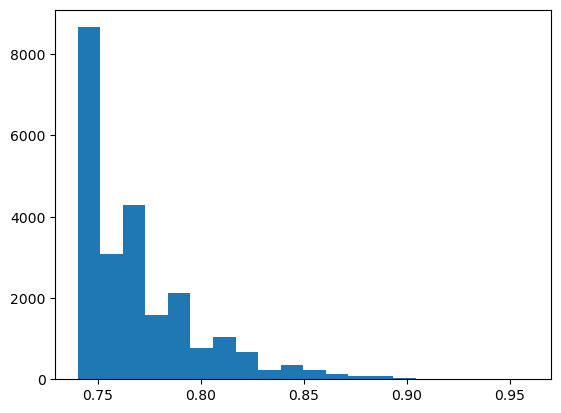

In [58]:
plt.hist(np.log10(earthquake_data.Magnitude), bins = 20)
plt.show()

We use `geopandas` for the geographical analysis. It makes our work way easier :) You can get it through pip: `~> pip install geopandas`. And also, we use the `gpd` as initials. We also have `geodatasets`, where we could find a lot of different datasets :)

In [63]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [64]:
# This is one of the most widely used datasets
geodatasets.data.naturalearth

{'land': {'url': 'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip',
  'license': 'CC0',
  'attribution': 'Natural Earth',
  'name': 'naturalearth.land',
  'description': 'Land polygons including major islands in a 1:110m resolution.',
  'geometry_type': 'Polygon',
  'details': 'https://www.naturalearthdata.com/downloads/110m-physical-vectors/110m-land/',
  'nrows': 127,
  'ncols': 4,
  'hash': '1926c621afd6ac67c3f36639bb1236134a48d82226dc675d3e3df53d02d2a3de',
  'filename': 'ne_110m_land.zip'}}

In [65]:
geodatasets.data.naturalearth.land.url

'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip'

In [66]:
gpd.read_file(geodatasets.data.naturalearth.land.url)

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Land,0,0.0,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Land,0,0.0,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


And here we go, we read the dataset. Just like that. There is also one easier way to read it faster.

In [68]:
geodatasets.get_path("naturalearth.land")

'/home/deyan/.cache/geodatasets/ne_110m_land.zip'

In [69]:
land = gpd.read_file(geodatasets.data.naturalearth.land.url)

In [70]:
land

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Land,0,0.0,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Land,0,0.0,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


In [72]:
land.dtypes

featurecla      object
scalerank        int64
min_zoom       float64
geometry      geometry
dtype: object

Oh, this one is pretty interesting. As you see, there is one extra column, with the type of `geometry`. Ow, yah, we could also plot it :D

<Axes: >

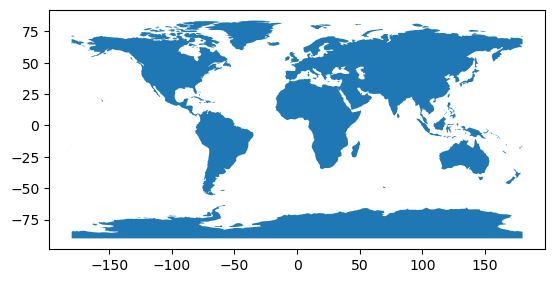

In [73]:
land.plot()

If you think that the image is way too small, you could change the size :D

<Axes: >

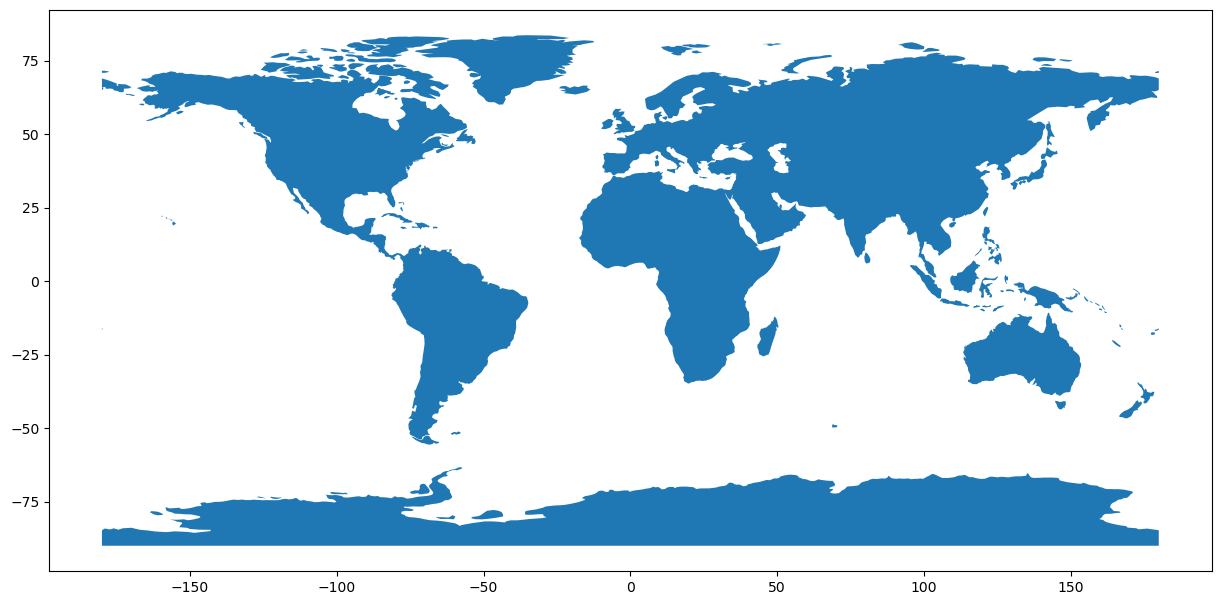

In [76]:
land.plot(figsize = (15, 12))

And also we could have something like this...

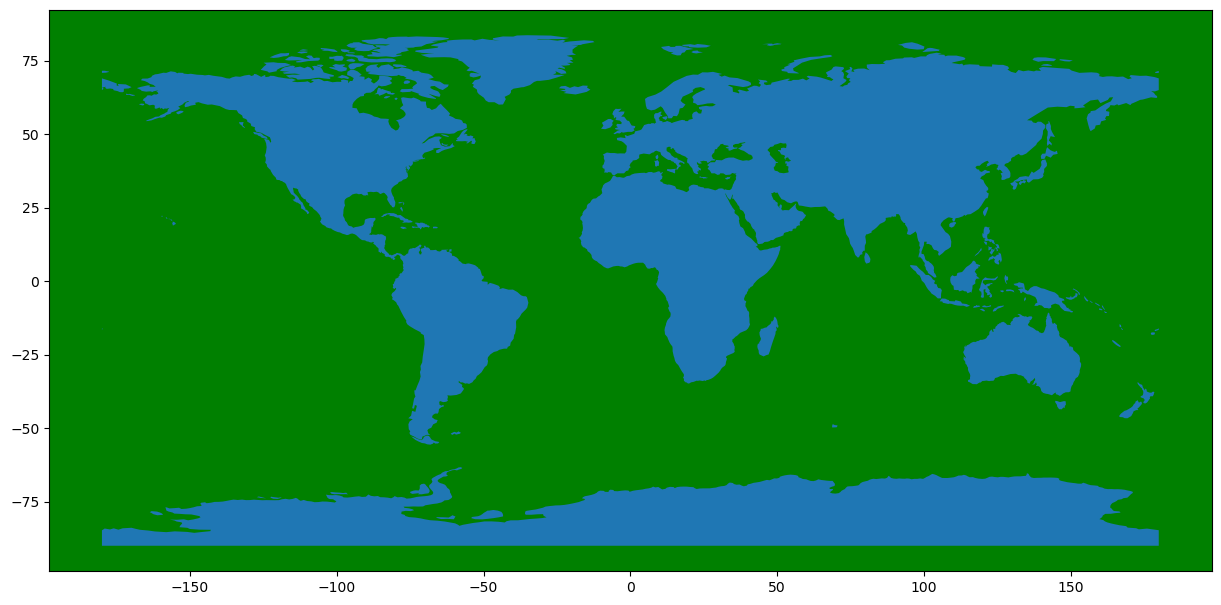

In [77]:
land.plot(figsize = (15, 12))
plt.gca().set_facecolor("green")

Or also this..

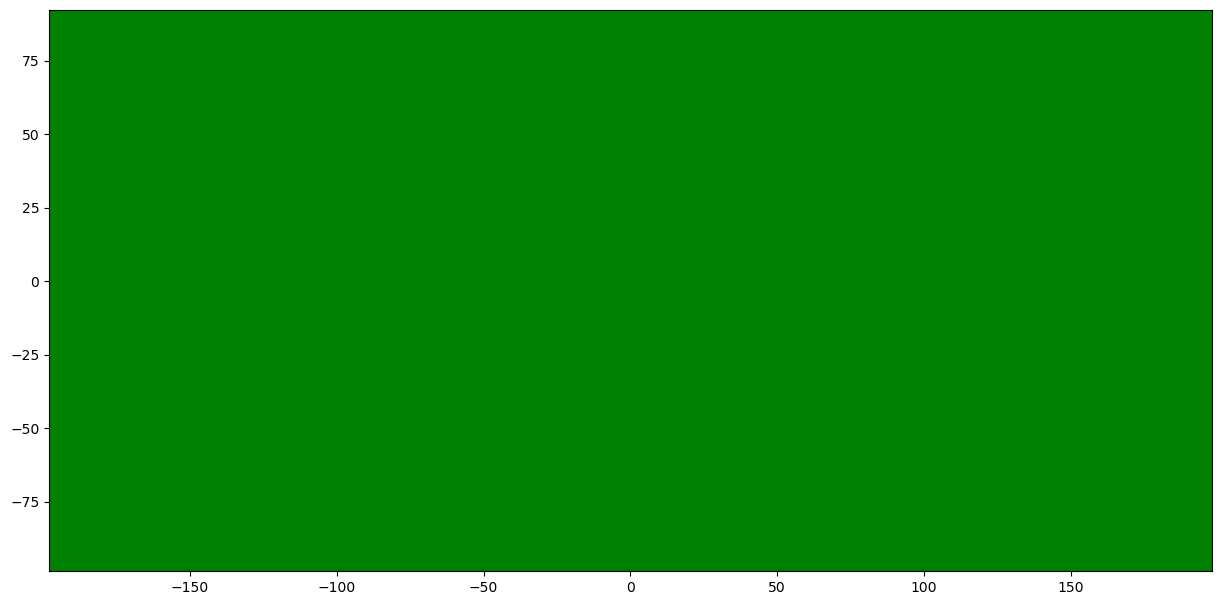

In [78]:
land.plot(figsize = (15, 12), color = "g")
plt.gca().set_facecolor("green")

Isn't it perfect. We could see everything :D

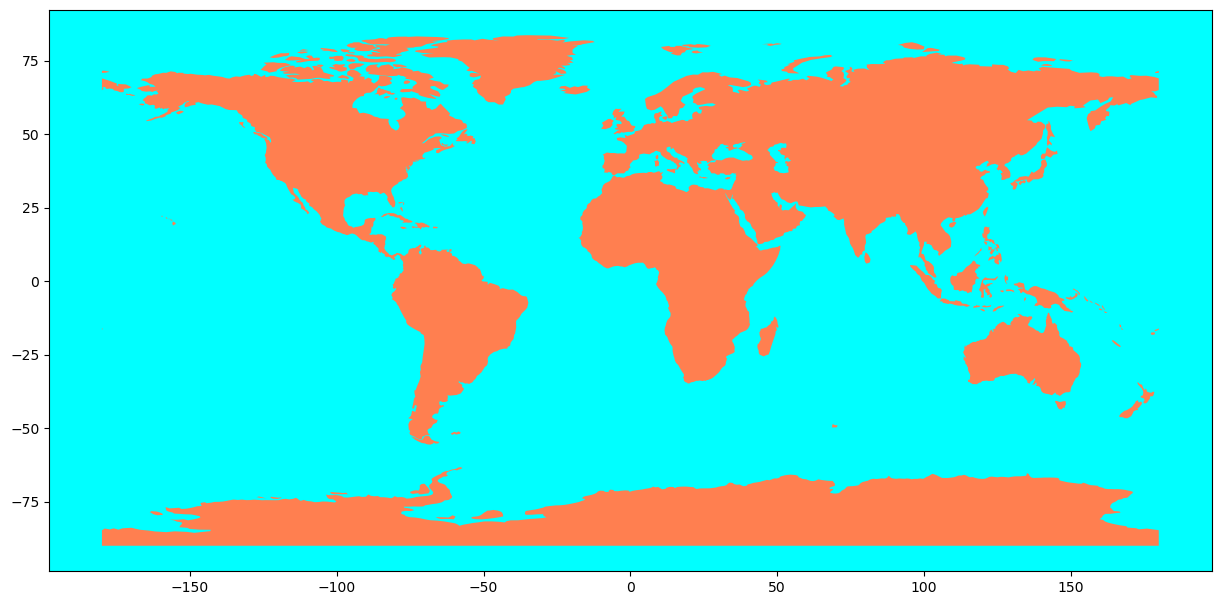

In [80]:
land.plot(figsize = (15, 12), color = "coral")
plt.gca().set_facecolor("aqua")
plt.show()

Yeah, this is kind of better :D

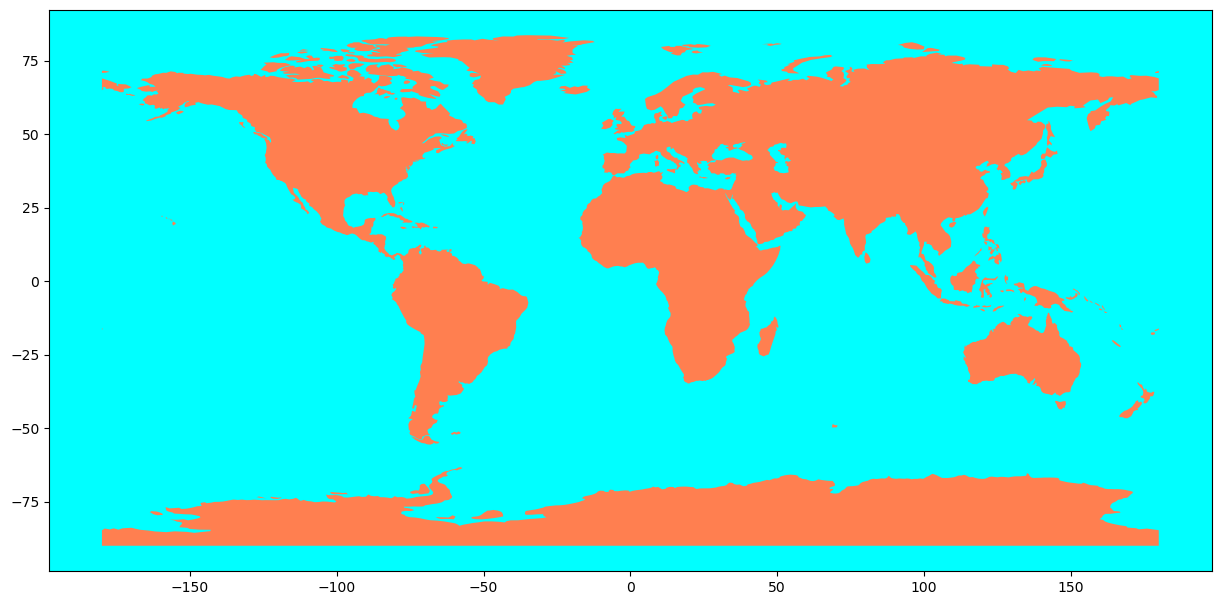

In [81]:
# Oh, btw it returns the axes, so you could refer it later like that
ax = land.plot(figsize = (15, 12), color = "coral")
ax.set_facecolor("aqua")
plt.show()

From now on, we could do whatever our hearth desires. Like, we could get the boundary :)

[]

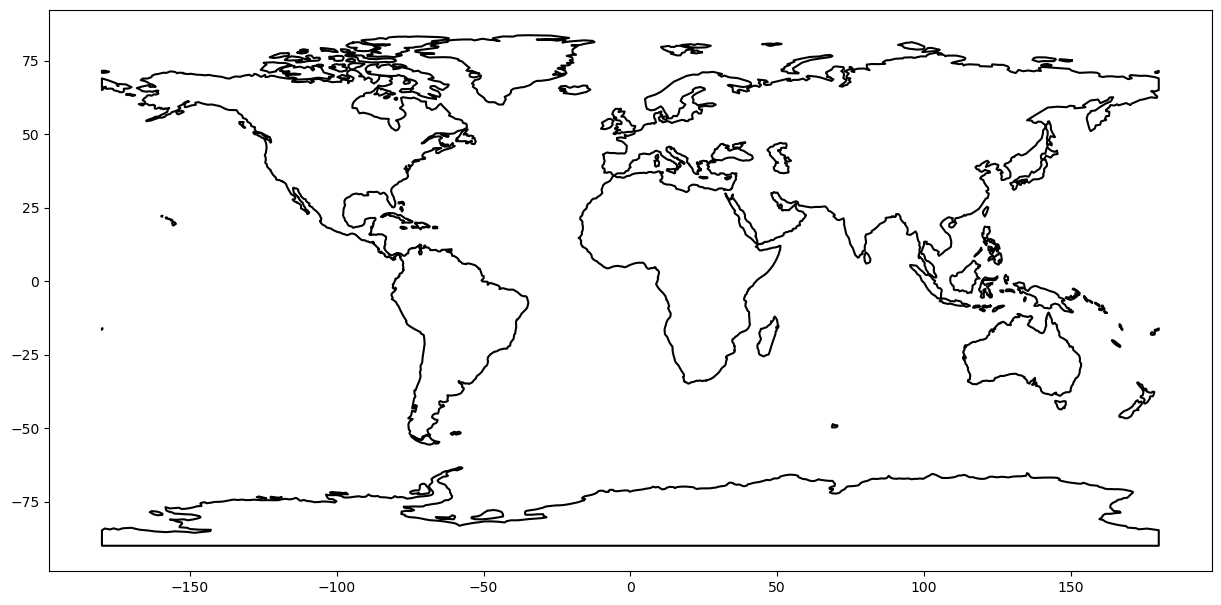

In [84]:
land.boundary.plot(figsize = (15, 12), color = "black")
plt.plot()

In [85]:
land.geometry

0      POLYGON ((-59.57209 -80.04018, -59.86585 -80.5...
1      POLYGON ((-159.20818 -79.49706, -161.12760 -79...
2      POLYGON ((-45.15476 -78.04707, -43.92083 -78.4...
3      POLYGON ((-121.21151 -73.50099, -119.91885 -73...
4      POLYGON ((-125.55957 -73.48135, -124.03188 -73...
                             ...                        
122    POLYGON ((51.13619 80.54728, 49.79368 80.41543...
123    POLYGON ((99.93976 78.88094, 97.75794 78.75620...
124    POLYGON ((-87.02000 79.66000, -85.81435 79.336...
125    POLYGON ((-68.50000 83.10632, -65.82735 83.028...
126    POLYGON ((-27.10046 83.51966, -20.84539 82.726...
Name: geometry, Length: 127, dtype: geometry

We could also do some subsetting

<Axes: >

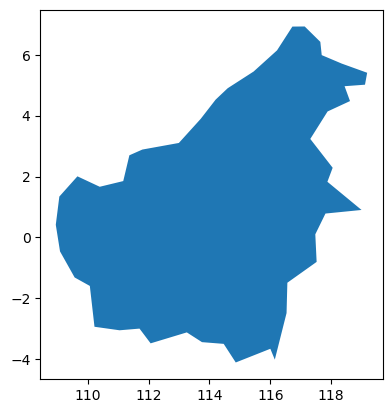

In [87]:
land.loc[42:42].plot()

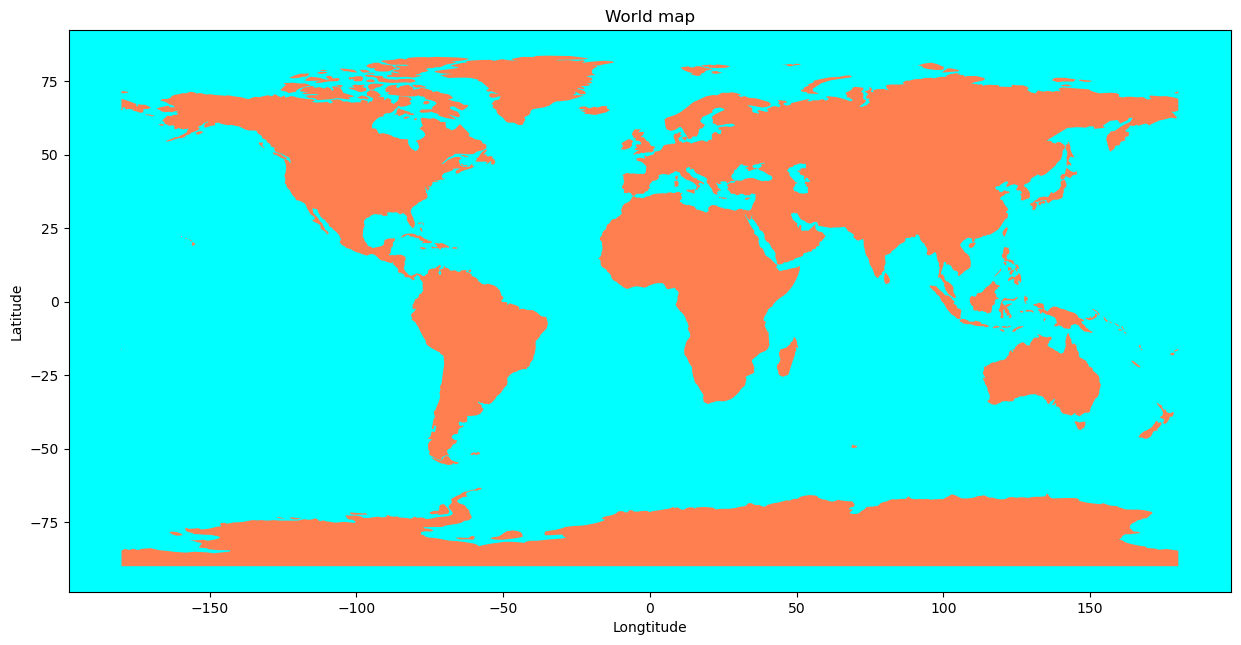

In [89]:
land.plot(figsize = (15, 12), color = "coral")

plt.title("World map")

plt.xlabel("Longtitude")
plt.ylabel("Latitude")

plt.gca().set_facecolor("aqua")
plt.show()

In [91]:
# We have the geodataframe function, but as we can see, we could not plot anything.
gpd.GeoDataFrame(earthquake_data)

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
0,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12
23408,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47
23409,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51
23410,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19


AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

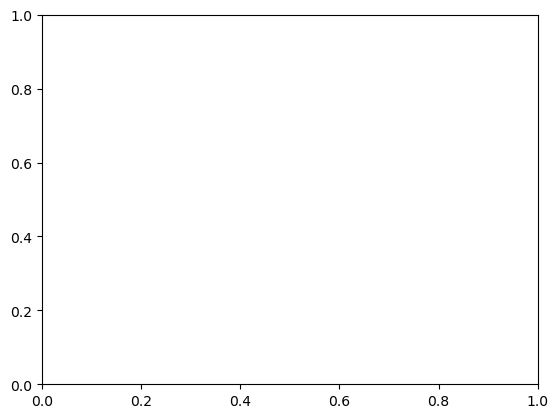

In [92]:
gpd.GeoDataFrame(earthquake_data).plot()

If we investigate a little, we will find, that gpd uses type called `Point`. We could import it like this: `from shapely.geometry import Point`

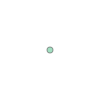

In [94]:
# We could create a point like this
Point(4, 3)

One thing to note, here. Latitude is the X coordinate, and Longtitude is the Y coordinate. Here it is reversed.

In [95]:
earthquake_data.Latitude, earthquake_data.Longitude

(0        19.2460
 1         1.8630
 2       -20.5790
 3       -59.0760
 4        11.9380
           ...   
 23407    38.3917
 23408    38.3777
 23409    36.9179
 23410    -9.0283
 23411    37.3973
 Name: Latitude, Length: 23409, dtype: float64,
 0        145.6160
 1        127.3520
 2       -173.9720
 3        -23.5570
 4        126.4270
            ...   
 23407   -118.8941
 23408   -118.8957
 23409    140.4262
 23410    118.6639
 23411    141.4103
 Name: Longitude, Length: 23409, dtype: float64)

In [97]:
points = []

for i, row in earthquake_data.iterrows():
    points.append(Point(row.Latitude, row.Longitude))

In [98]:
points

[<POINT (19.246 145.616)>,
 <POINT (1.863 127.352)>,
 <POINT (-20.579 -173.972)>,
 <POINT (-59.076 -23.557)>,
 <POINT (11.938 126.427)>,
 <POINT (-13.405 166.629)>,
 <POINT (27.357 87.867)>,
 <POINT (-13.309 166.212)>,
 <POINT (-56.452 -27.043)>,
 <POINT (-24.563 178.487)>,
 <POINT (-6.807 108.988)>,
 <POINT (-2.608 125.952)>,
 <POINT (54.636 161.703)>,
 <POINT (-18.697 -177.864)>,
 <POINT (37.523 73.251)>,
 <POINT (-51.84 139.741)>,
 <POINT (51.251 178.715)>,
 <POINT (51.639 175.055)>,
 <POINT (52.528 172.007)>,
 <POINT (51.626 175.746)>,
 <POINT (51.037 177.848)>,
 <POINT (51.73 173.975)>,
 <POINT (51.775 173.058)>,
 <POINT (52.611 172.588)>,
 <POINT (51.831 174.368)>,
 <POINT (51.948 173.969)>,
 <POINT (51.443 179.605)>,
 <POINT (52.773 171.974)>,
 <POINT (51.772 174.696)>,
 <POINT (52.975 171.091)>,
 <POINT (52.99 170.874)>,
 <POINT (51.536 175.045)>,
 <POINT (13.245 -44.922)>,
 <POINT (51.812 174.206)>,
 <POINT (51.762 174.841)>,
 <POINT (52.438 174.321)>,
 <POINT (51.946 173.84)>

In [101]:
earthquake_data = gpd.GeoDataFrame(data = earthquake_data, geometry = points, crs = "epsg:4326") # crs = cordinate reference system

In [102]:
earthquake_data

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime,geometry
0,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18,POINT (19.24600 145.61600)
1,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49,POINT (1.86300 127.35200)
2,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58,POINT (-20.57900 -173.97200)
3,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43,POINT (-59.07600 -23.55700)
4,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50,POINT (11.93800 126.42700)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,...,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12,POINT (38.39170 -118.89410)
23408,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,...,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47,POINT (38.37770 -118.89570)
23409,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,...,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51,POINT (36.91790 140.42620)
23410,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,...,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19,POINT (-9.02830 118.66390)


[]

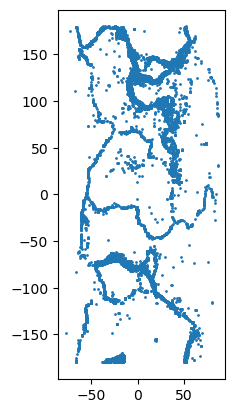

In [104]:
earthquake_data.plot(markersize = 1)
plt.plot()

Well... now this is interesting... Now, let's think about why our data is turned sideways. Actually, the answer is pretty simple. As you remember, here the X and Y coordinates are kind of reversed. This means, that the vertical line is the X, and the horizontal one is the Y. How do we fix it? Just append the points in different order :D

In [105]:
points = []

for i, row in earthquake_data.iterrows():
    points.append(Point(row.Longitude, row.Latitude))

In [106]:
earthquake_data = gpd.GeoDataFrame(data = earthquake_data, geometry = points, crs = "epsg:4326") # crs = cordinate reference system

[]

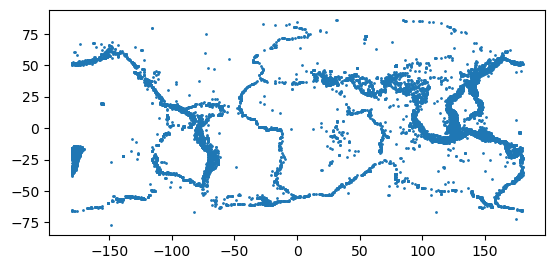

In [108]:
earthquake_data.plot(markersize = 1)
plt.plot()

See? Our problem is fixed now :D And now, here it comes the magic. We will plot it on the map.

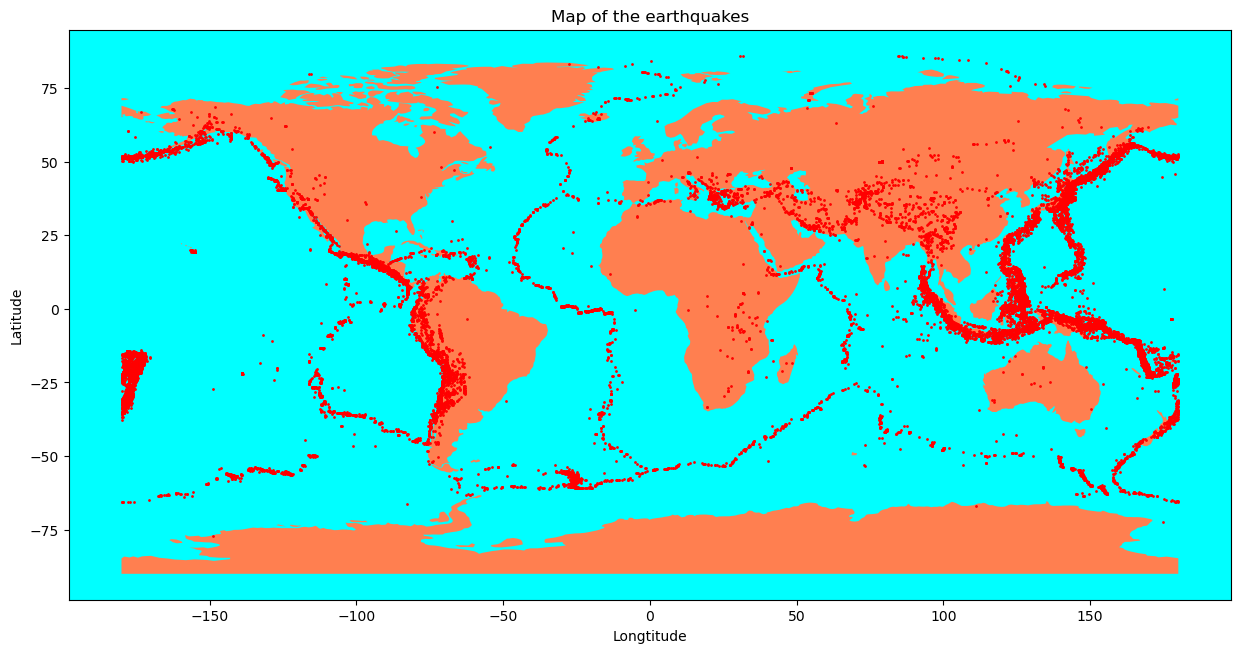

In [115]:
ax = land.plot(figsize = (15, 12), color = "coral")
ax.set_facecolor("aqua")

earthquake_data.plot(ax = ax, c = "r", markersize = 1)

plt.title("Map of the earthquakes")

plt.xlabel("Longtitude")
plt.ylabel("Latitude")

plt.show()

In [116]:
# Also, we could have done it like this
zip(earthquake_data.Longitude, earthquake_data.Latitude)

In [117]:
list(zip(earthquake_data.Longitude, earthquake_data.Latitude))

[(145.616, 19.246),
 (127.352, 1.863),
 (-173.972, -20.579),
 (-23.557, -59.076),
 (126.427, 11.938),
 (166.629, -13.405),
 (87.867, 27.357),
 (166.212, -13.309),
 (-27.043, -56.452),
 (178.487, -24.563),
 (108.988, -6.807),
 (125.952, -2.608),
 (161.703, 54.636),
 (-177.864, -18.697),
 (73.251, 37.523),
 (139.741, -51.84),
 (178.715, 51.251),
 (175.055, 51.639),
 (172.007, 52.528),
 (175.746, 51.626),
 (177.848, 51.037),
 (173.975, 51.73),
 (173.058, 51.775),
 (172.588, 52.611),
 (174.368, 51.831),
 (173.969, 51.948),
 (179.605, 51.443),
 (171.974, 52.773),
 (174.696, 51.772),
 (171.091, 52.975),
 (170.874, 52.99),
 (175.045, 51.536),
 (-44.922, 13.245),
 (174.206, 51.812),
 (174.841, 51.762),
 (174.321, 52.438),
 (173.84, 51.946),
 (174.566, 51.738),
 (176.558, 51.487),
 (-162.008, 53.008),
 (175.505, 52.184),
 (172.918, 52.076),
 (175.213, 51.744),
 (174.116, 52.057),
 (-161.859, 53.191),
 (176.469, 51.447),
 (173.393, 51.258),
 (175.411, 52.031),
 (179.092, 51.294),
 (165.426, 55.2

In [118]:
[Point(x) for x in zip(earthquake_data.Longitude, earthquake_data.Latitude)]

[<POINT (145.616 19.246)>,
 <POINT (127.352 1.863)>,
 <POINT (-173.972 -20.579)>,
 <POINT (-23.557 -59.076)>,
 <POINT (126.427 11.938)>,
 <POINT (166.629 -13.405)>,
 <POINT (87.867 27.357)>,
 <POINT (166.212 -13.309)>,
 <POINT (-27.043 -56.452)>,
 <POINT (178.487 -24.563)>,
 <POINT (108.988 -6.807)>,
 <POINT (125.952 -2.608)>,
 <POINT (161.703 54.636)>,
 <POINT (-177.864 -18.697)>,
 <POINT (73.251 37.523)>,
 <POINT (139.741 -51.84)>,
 <POINT (178.715 51.251)>,
 <POINT (175.055 51.639)>,
 <POINT (172.007 52.528)>,
 <POINT (175.746 51.626)>,
 <POINT (177.848 51.037)>,
 <POINT (173.975 51.73)>,
 <POINT (173.058 51.775)>,
 <POINT (172.588 52.611)>,
 <POINT (174.368 51.831)>,
 <POINT (173.969 51.948)>,
 <POINT (179.605 51.443)>,
 <POINT (171.974 52.773)>,
 <POINT (174.696 51.772)>,
 <POINT (171.091 52.975)>,
 <POINT (170.874 52.99)>,
 <POINT (175.045 51.536)>,
 <POINT (-44.922 13.245)>,
 <POINT (174.206 51.812)>,
 <POINT (174.841 51.762)>,
 <POINT (174.321 52.438)>,
 <POINT (173.84 51.946)>

In [119]:
points = [Point(x) for x in zip(earthquake_data.Longitude, earthquake_data.Latitude)]

This is the faster way to do it :)

In [120]:
# We also have a volcano dataset
volcano_data = pd.read_csv("data/volcanos.csv")

In [121]:
volcano_data

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [122]:
points = [Point(x) for x in zip(volcano_data.Longitude, volcano_data.Latitude)]

In [124]:
volcano_data = gpd.GeoDataFrame(data = volcano_data, geometry = points, crs = "epsg:4326")

In [125]:
volcano_data

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,geometry
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km),POINT (6.85000 50.17000)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),POINT (2.97000 45.77500)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),POINT (2.53000 42.17000)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),POINT (-4.02000 38.87000)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km),POINT (10.87000 43.25000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),POINT (-27.57000 -56.30000)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km),POINT (-28.16700 -55.91200)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km),POINT (165.50000 -73.45000)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),POINT (-57.75000 -64.15000)


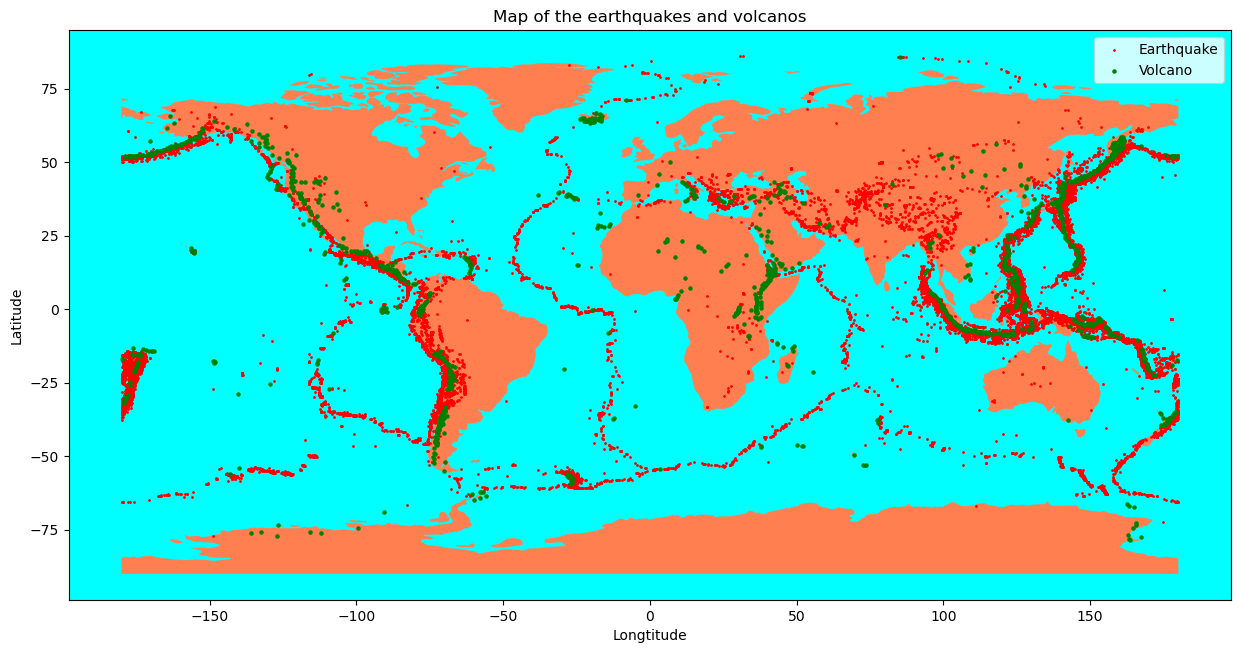

In [127]:
# Now let's add it to the previous plot
ax = land.plot(figsize = (15, 12), color = "coral")
ax.set_facecolor("aqua")

earthquake_data.plot(ax = ax, c = "r", markersize = 1, label = "Earthquake")
volcano_data.plot(ax = ax, c = "g", markersize = 5, label = "Volcano")


plt.title("Map of the earthquakes and volcanos")
plt.legend()

plt.xlabel("Longtitude")
plt.ylabel("Latitude")

plt.show()

### So, first - what is a projection?

As we know, the Earth is not flat. But we need to display it on the screen. So we use a projection for this purpose. Which is the most widely used projection, you may ask? [`wsg84`](https://en.wikipedia.org/wiki/World_Geodetic_System), or [`EPSG:4326`](https://epsg.io). There are other projections, though. Each with it's own purpose :D

In [128]:
land.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [130]:
# We could also convert it
land.to_crs(epsg = 3395).crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

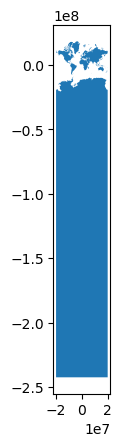

In [131]:
land.to_crs(epsg = 3395).plot()

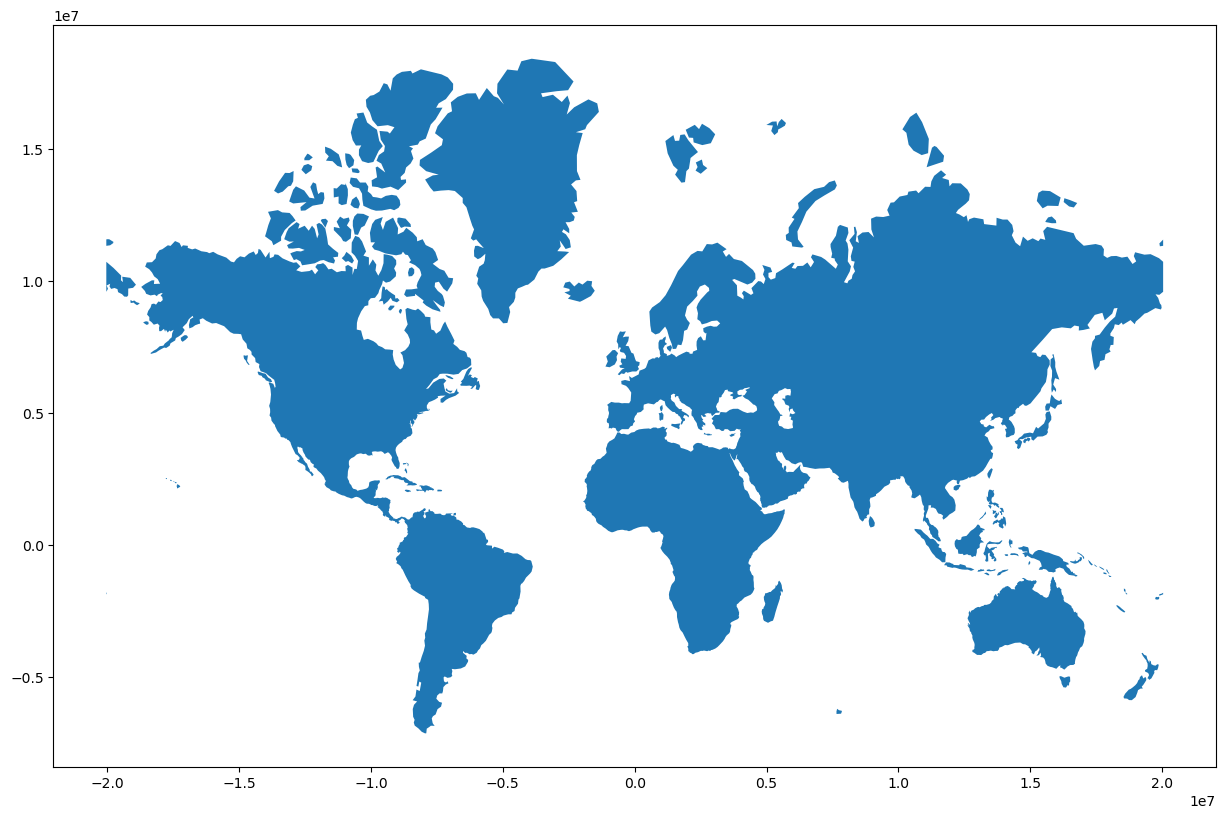

In [135]:
land[10:].to_crs(epsg = 3857).plot(figsize = (15, 12)) # Change the espg (projection) if you want to
plt.show()

Choropleth maps are also pretty easy to do in plt :D

In [138]:
# Here we are reading different type of file :o
states = gpd.read_file("data/s_22mr22/")

In [139]:
states

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.240980,64.240190,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


<Axes: >

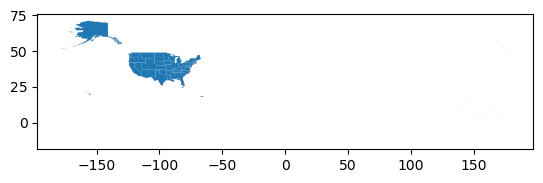

In [140]:
states.plot()

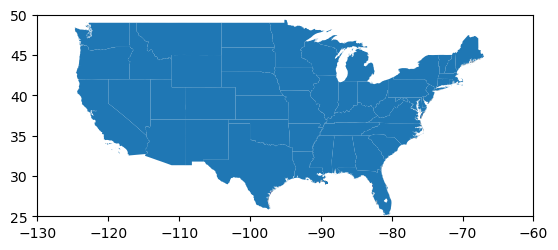

In [142]:
ax = states.plot()
ax.set_ylim(25, 50)
ax.set_xlim(-130, -60)
plt.show()

In [153]:
ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv")

/tmp/ipykernel_91942/4066352051.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv")


In [154]:
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [155]:
ufos.datetime

0        10/10/1949 20:30
1        10/10/1949 21:00
2        10/10/1955 17:00
3        10/10/1956 21:00
4        10/10/1960 20:00
               ...       
80327      9/9/2013 21:15
80328      9/9/2013 22:00
80329      9/9/2013 22:00
80330      9/9/2013 22:20
80331      9/9/2013 23:00
Name: datetime, Length: 80332, dtype: object

In [161]:
ufos = ufos[ufos.country == "us"]

In [163]:
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]

In [164]:
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,tn,36.165833,-86.784444
80328,9/9/2013 22:00,us,id,43.613611,-116.202500
80329,9/9/2013 22:00,us,ca,38.297222,-122.284444
80330,9/9/2013 22:20,us,va,38.901111,-77.265556


In [166]:
# Let's see the information about each one by state
ufos.groupby("state").size()

state
ak     319
al     642
ar     588
az    2414
ca    8912
co    1413
ct     892
dc       7
de     166
fl    3835
ga    1255
hi     262
ia     678
id     521
il    2499
in    1288
ks     613
ky     855
la     558
ma    1256
md     837
me     558
mi    1836
mn    1012
mo    1458
ms     375
mt     478
nc    1740
nd     129
ne     381
nh     486
nj    1255
nm     720
nv     803
ny    2980
oh    2275
ok     724
or    1747
pa    2366
pr      25
ri     228
sc    1003
sd     183
tn    1119
tx    3447
ut     622
va    1273
vt     260
wa    3966
wi    1232
wv     448
wy     175
dtype: int64

In [167]:
num_sightings = ufos.groupby("state").size()

In [168]:
# We also have the states names in other csv file xd
state_names = pd.read_csv("data/states.csv")

In [169]:
state_names

,abbreviation,name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DC,District of Columbia
9,DE,Delaware


In [171]:
num_sightings = num_sightings.reset_index().rename(columns = {0: "count"})

In [172]:
num_sightings

,state,count
0,ak,319
1,al,642
2,ar,588
3,az,2414
4,ca,8912
5,co,1413
6,ct,892
7,dc,7
8,de,166
9,fl,3835


In [173]:
num_sightings.state = num_sightings.state.str.upper()

In [174]:
num_sightings.merge(state_names, left_on = "state", right_on = "abbreviation")

,state,count,abbreviation,name
0,AK,319,AK,Alaska
1,AL,642,AL,Alabama
2,AR,588,AR,Arkansas
3,AZ,2414,AZ,Arizona
4,CA,8912,CA,California
5,CO,1413,CO,Colorado
6,CT,892,CT,Connecticut
7,DC,7,DC,District of Columbia
8,DE,166,DE,Delaware
9,FL,3835,FL,Florida


In [175]:
num_sightings.merge(state_names, left_on = "state", right_on = "abbreviation")[["name", "count"]]

,name,count
0,Alaska,319
1,Alabama,642
2,Arkansas,588
3,Arizona,2414
4,California,8912
5,Colorado,1413
6,Connecticut,892
7,District of Columbia,7
8,Delaware,166
9,Florida,3835


In [176]:
num_sightings = num_sightings.merge(state_names, left_on = "state", right_on = "abbreviation")[["name", "count"]]

In [179]:
num_sightings = num_sightings.merge(states, left_on = "name", right_on = "NAME")

In [180]:
num_sightings

,name,count,STATE,NAME,FIPS,LON,LAT,geometry
0,Alaska,319,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,Alabama,642,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,Arkansas,588,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,Arizona,2414,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
4,California,8912,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
5,Colorado,1413,CO,Colorado,08,-105.54783,38.99855,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
6,Connecticut,892,CT,Connecticut,09,-72.72623,41.62196,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
7,District of Columbia,7,DC,District of Columbia,11,-77.01464,38.90932,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
8,Delaware,166,DE,Delaware,10,-75.50592,38.99559,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."
9,Florida,3835,FL,Florida,12,-82.50934,28.67402,"MULTIPOLYGON (((-81.96339 24.52110, -81.96374 ..."


<Axes: >

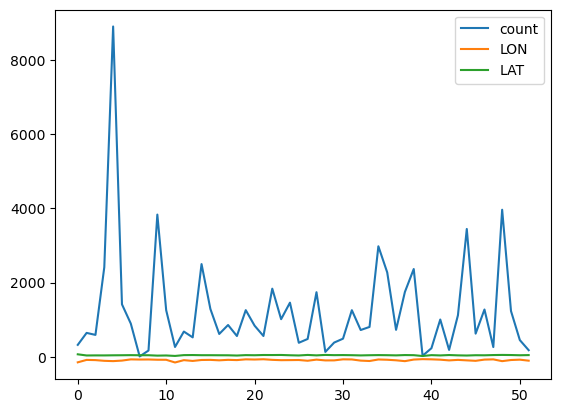

In [181]:
num_sightings.plot()

In [184]:
type(num_sightings)

pandas.core.frame.DataFrame

Hm, we want to plot a geo dataframe, so we could visualize it better.

In [185]:
type(states)

geopandas.geodataframe.GeoDataFrame

In [187]:
num_sightings = gpd.GeoDataFrame(data = num_sightings, geometry = states.geometry, crs = states.crs)

In [188]:
type(num_sightings)

geopandas.geodataframe.GeoDataFrame

Okay, we created the new GeoDataFrame, which contains the new data :)

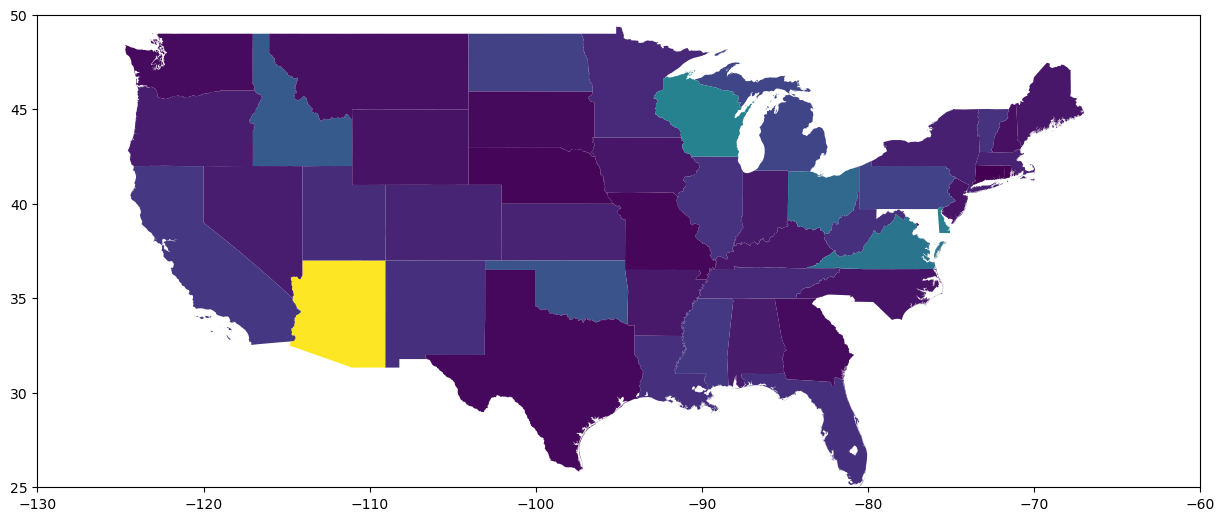

In [194]:
ax = num_sightings.plot(column = "count", figsize=(15, 12))#, legend = True)

ax.set_ylim(25, 50)
ax.set_xlim(-130, -60)

plt.show()

We have many other formats, like GeoJson or KML, which geopandas could read :) You just need to find the shapefile ;)

<Axes: >

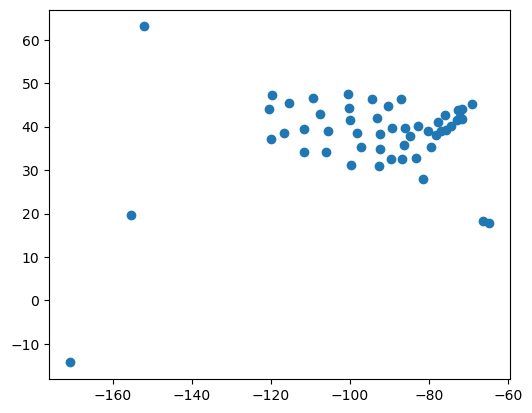

In [198]:
# We could also plot the centres of the states
#num_sightings.geometry.centroid.plot()
num_sightings.geometry.representative_point().plot() # This is how we get the representative point

### Analyzing Maps
* There are many algorithms used to model spatial data
    * Most commonly, we look for density patterns and clusters of points
    * Common algorithms are
        * KDE - Kernel Density Estimation
        * kMeans Clustering
        * Hierarchical Clustering
        * kNN - k Nearest Neighbors
    * This course doesn't deal with modelling, se we won't get into more detail
        * But feel free to explore the algorithms as you wish
        * You can see details on these on machene learning-related articles
* We can also represent the map as a network

Date: 13.07.2023